<h1>Step 1: Importing Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score   

<h2>Step 2: Uploading Data </h2>

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

<h1>Step 3: Reading Data</h1>

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<h1>Step 4: Checking null value in dataset</h1>

In [4]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<h1>Step 5: Separate between Dependent and Independent variable</h1>

In [5]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

<h1>Step 6: Split the data in Training and Testing</h1>

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [7]:
x_train.shape

(300, 2)

In [8]:
x_test.shape

(100, 2)

In [9]:
y_train.shape

(300,)

In [10]:
y_test.shape

(100,)

<h1>Step 7: Feature Scaling</h1>

In [11]:
scaler=StandardScaler()

In [12]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [13]:
# Display
# Show first 5 scaled value of x_train
print("First 5 records \n",x_train_scaled[:5])
# Show first 5 scaled value of x_test
print("First 5 records \n",x_test_scaled[:5])

First 5 records 
 [[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]
First 5 records 
 [[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]


<h1>Step 8: Model Training (Applying DecisionTreeClassifier)</h1>

In [14]:
dt=DecisionTreeClassifier(random_state=0)

In [15]:
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


<h1> Step 9: Predict on unseen data</h1>

In [16]:
y_pred=dt.predict(x_test_scaled)

D:\backup data\Virtual Environment\internship\vishal_intern\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [17]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<h1>Step 10: Confusion matrix and Accuracy Score</h1>

In [18]:
cm=confusion_matrix(y_test, y_pred)

In [19]:
cm

array([[68,  0],
       [32,  0]])

In [20]:
print("Decision Tree Accuracy:",accuracy_score(y_test,y_pred)*100)

Decision Tree Accuracy: 68.0


<h1>Step 11: Check</h1>

In [21]:
new_data=np.array([[19,19000],[35,20000]])

In [22]:
dt.predict(new_data)

D:\backup data\Virtual Environment\internship\vishal_intern\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 0])

<h1>Plot Decision Tree</h1>

In [23]:
from sklearn.tree import plot_tree

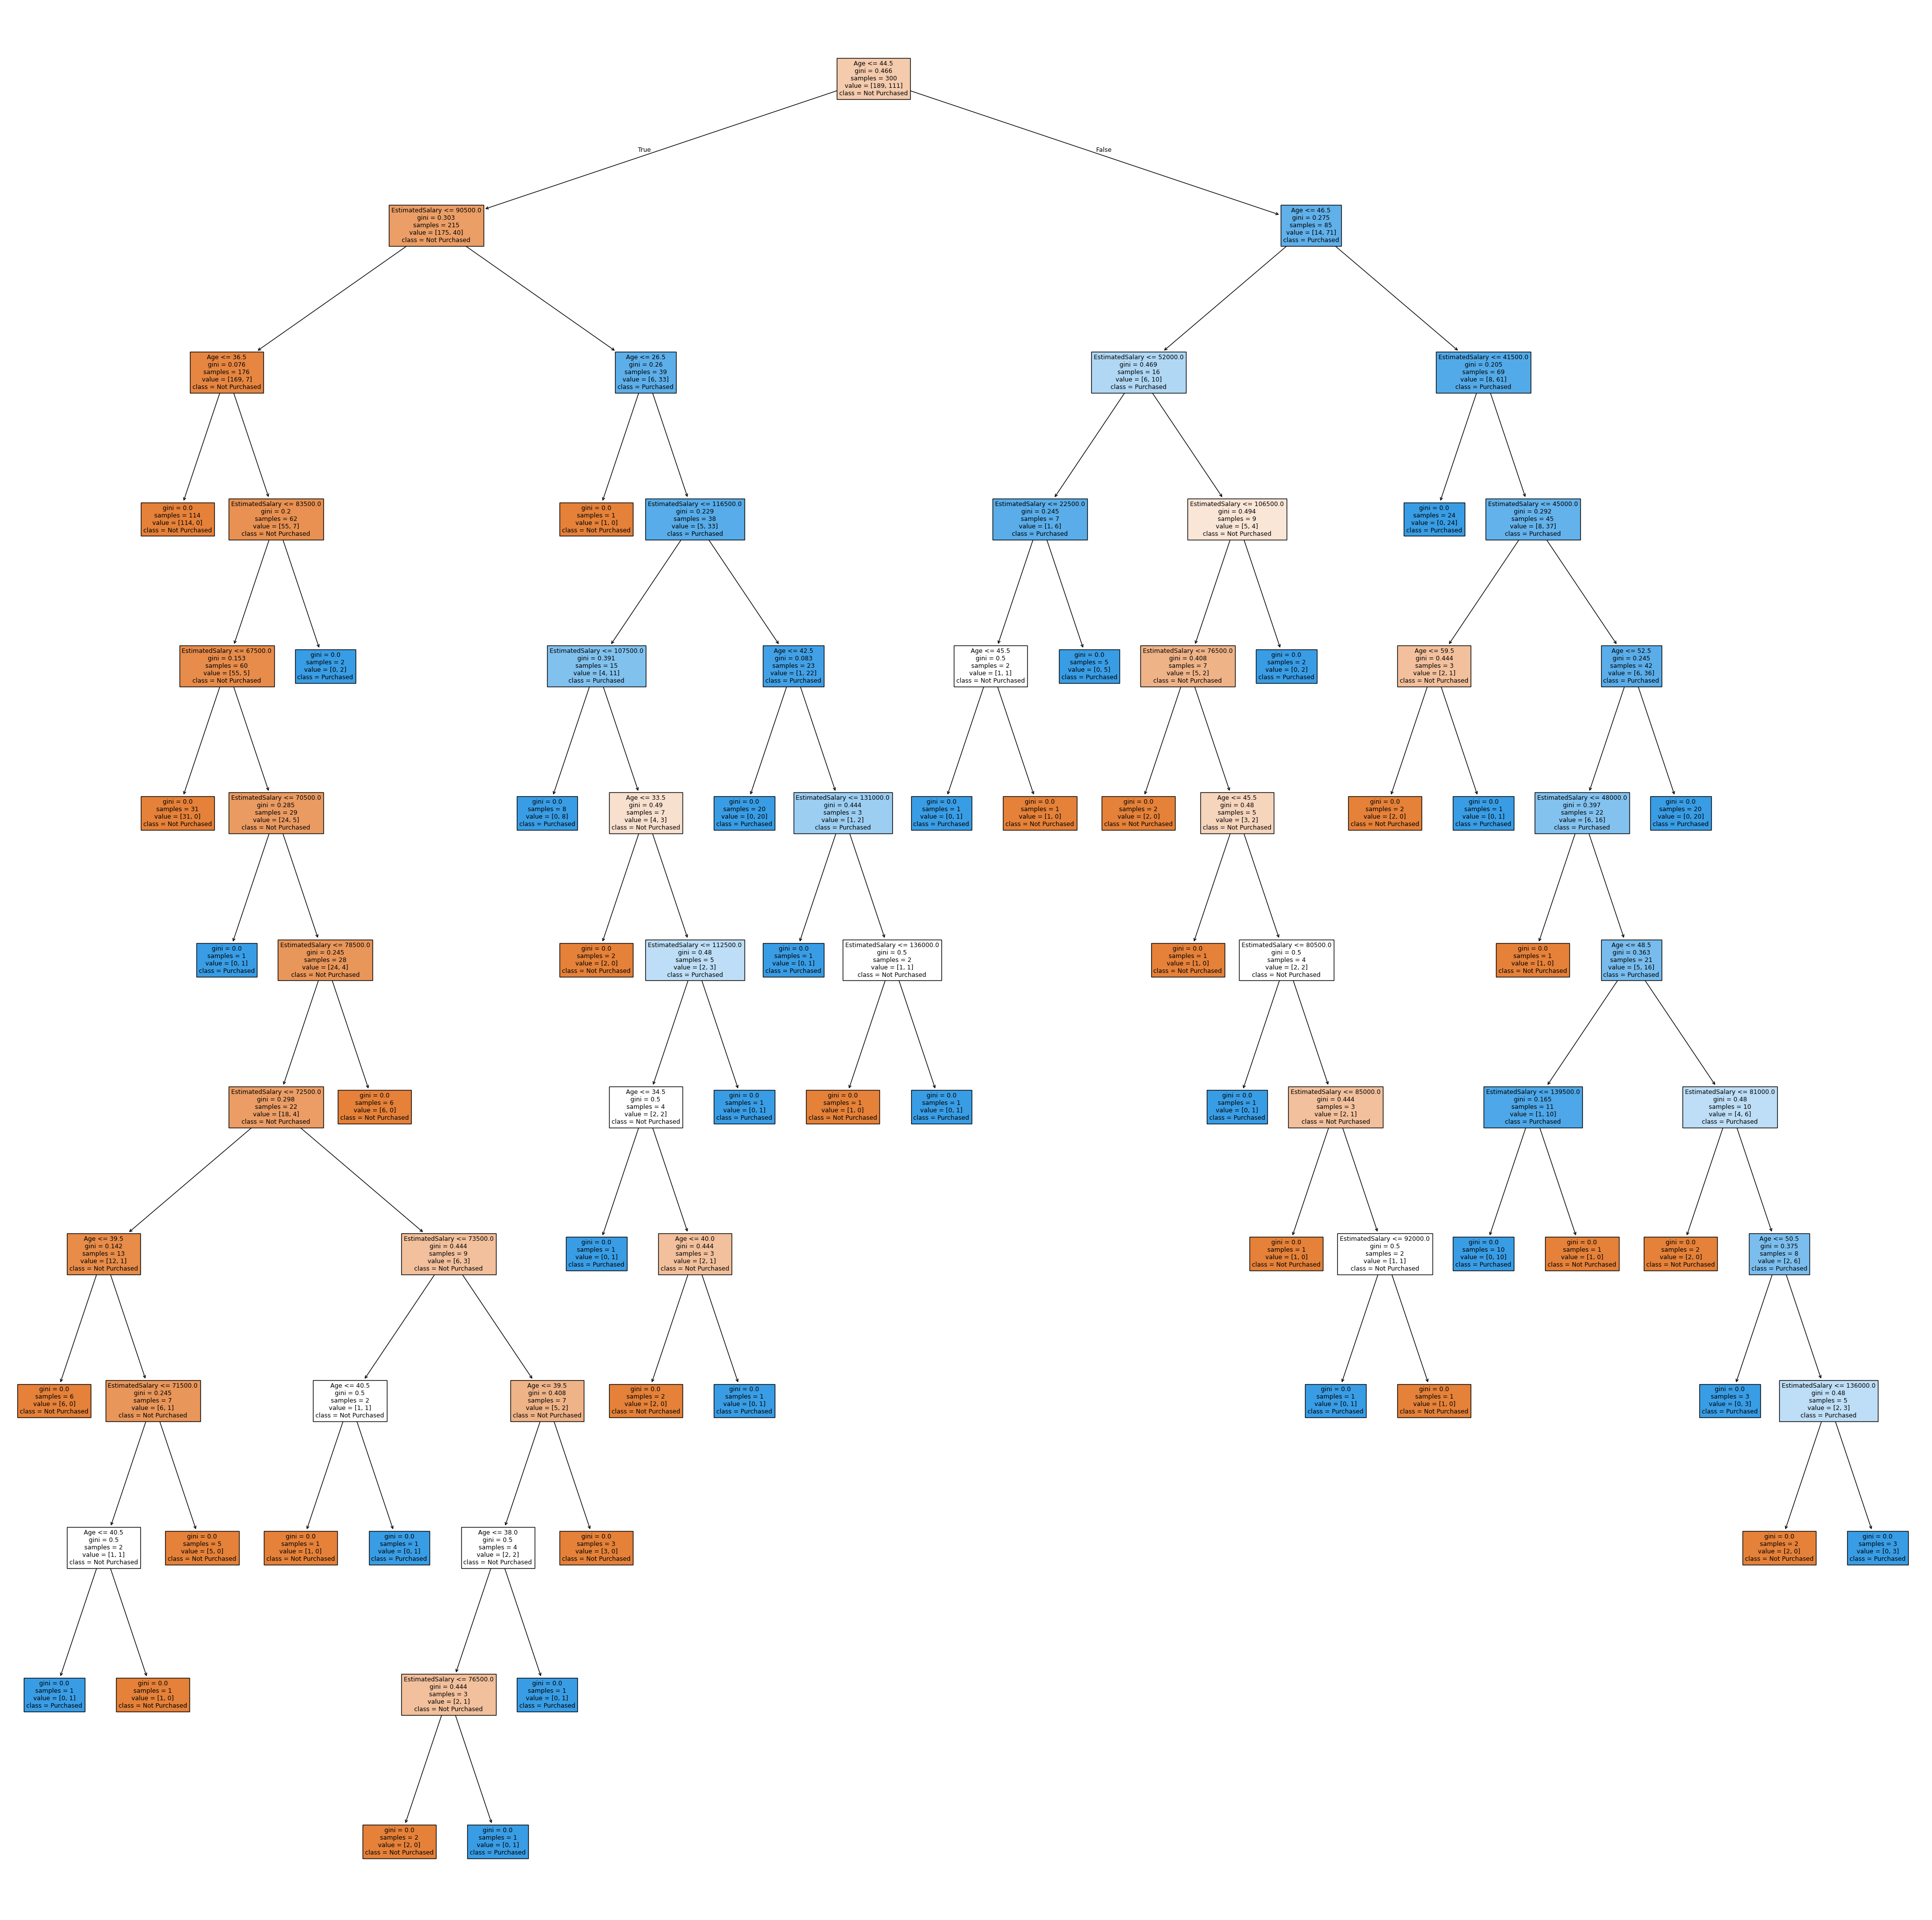

In [24]:
plt.figure(figsize=(50,50))
plot_tree(dt,
          feature_names=['Age','EstimatedSalary'],
          class_names=['Not Purchased','Purchased'],
          filled=True)
plt.savefig('demo.jpg')
plt.show()

In [25]:
!pip install mlxtend

  Using cached mlxtend-0.24.0-py3-none-any.whl.metadata (7.3 kB)
INFO: pip is looking at multiple versions of mlxtend to determine which version is compatible with other requirements. This could take a while.
  Using cached mlxtend-0.23.4-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.4-py3-none-any.whl (1.4 MB)


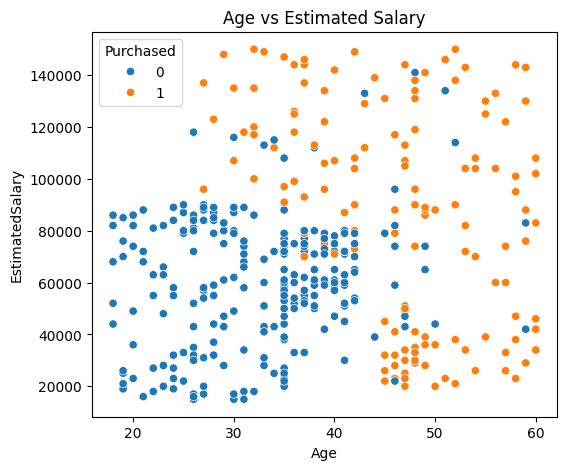

In [30]:
# Create Scatter Plot
plt.figure(figsize=(6,5))
sns.scatterplot(x="Age",
                 y="EstimatedSalary",
                 hue="Purchased",
                 data=df
                )
plt.title("Age vs Estimated Salary")
plt.show()

In [31]:
from mlxtend.plotting import plot_decision_regions

In [37]:
x = x.to_numpy()
y = y.to_numpy()

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [39]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [40]:
model = DecisionTreeClassifier(criterion="gini", random_state=0)

In [41]:
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


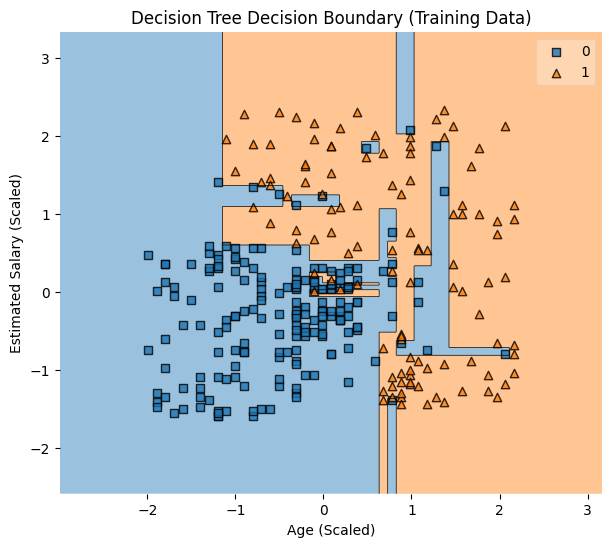

In [42]:
plt.figure(figsize=(7,6))
plot_decision_regions(x_train, y_train, clf=model)
plt.title("Decision Tree Decision Boundary (Training Data)")
plt.xlabel("Age (Scaled)")
plt.ylabel("Estimated Salary (Scaled)")
plt.show()